In [2]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from acoustic_data_science import config

def date(str): 
    return str[:10]

In [51]:
#read in data 

ice_data = pd.read_csv(config.external_data_path + '/hazel_ice_data.csv')
ice_data['Date'] = pd.to_datetime(ice_data['Date'], dayfirst=True)  #change to datetime format 
ice_data['Concentration'].replace({'no ice':0}, inplace=True)   #replace with numerical formatting
ice_data['Concentration'] = pd.to_numeric(ice_data['Concentration'])   
ice_data


,Date,Concentration,Stage of Development,Form of Ice,Mean Temperature,Normal Temperature,Ice Profiler
0,2018-09-03,0.0,no ice info,no ice info,4.9,3.3,-0.036379
1,2018-09-10,0.0,no ice info,no ice info,1.0,1.8,-0.038345
2,2018-09-17,0.0,no ice info,no ice info,-2.5,0.1,-0.040294
3,2018-09-24,0.0,no ice info,no ice info,-4.4,-2.0,-0.029977
4,2018-10-01,0.1,no ice info,no ice info,-4.9,-4.4,-0.029508
5,2018-10-08,0.7,New Ice,no ice info,-7.7,-7.1,-0.028988
6,2018-10-15,0.3,New Ice,Fast ice,-9.8,-10.0,0.052866
7,2018-10-22,0.9,Grey Ice,Fast ice,-14.0,-12.7,0.238501
8,2018-11-05,0.9,Grey Ice,Fast ice,-10.5,-17.2,0.400979
9,2018-11-12,1.0,Thin first-year ice,Fast ice,-22.6,-20.9,0.413586


In [35]:
daily_temp = pd.read_feather(config.processed_data_path + '/daily_temperature_cambay_shorestation.feather')
daily_temp = daily_temp[(daily_temp["timestamp"].dt.month > 8) | (daily_temp["timestamp"].dt.year == 2019)]
daily_temp


,timestamp,mean_temperature
31,2018-09-01,5.126290
32,2018-09-02,3.929455
33,2018-09-03,1.726962
34,2018-09-04,2.408717
35,2018-09-05,1.706280
...,...,...
358,2019-07-25,5.329940
359,2019-07-26,5.365808
360,2019-07-27,6.282461
361,2019-07-28,7.126437


In [54]:
from datetime import datetime
onset_sod_1 = datetime.strptime('08/10/2018', '%d/%m/%Y')
onset_sod_4 = datetime.strptime('22/10/2018', '%d/%m/%Y')
onset_sod_7 = datetime.strptime('12/11/2018', '%d/%m/%Y')
onset_sod_1dot = datetime.strptime('24/12/2018', '%d/%m/%Y')
onset_sod_4dot = datetime.strptime('11/02/2019', '%d/%m/%Y')

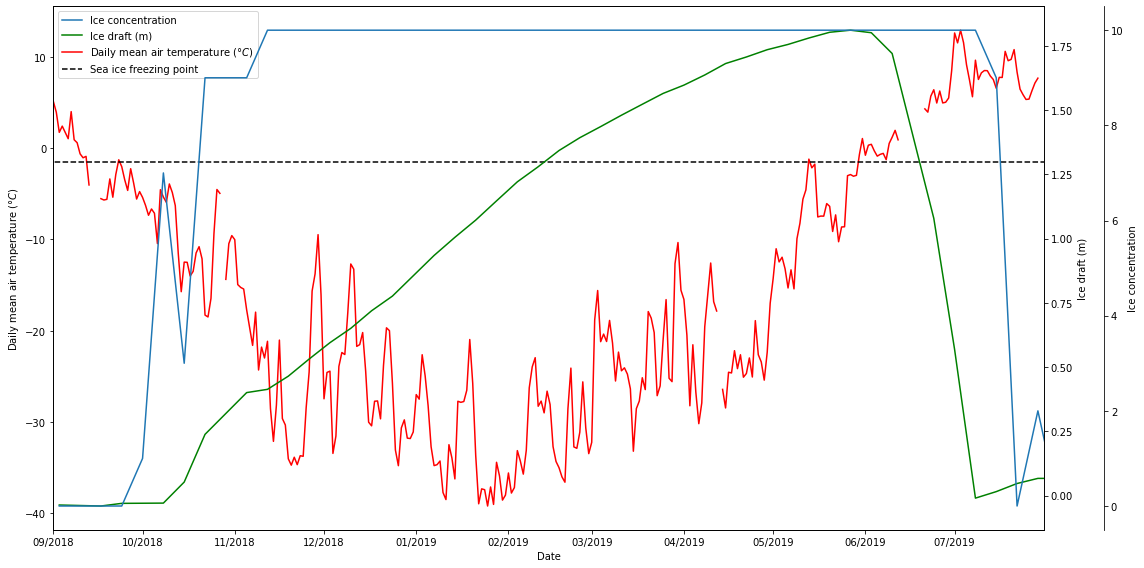

In [70]:
fig,ax = plt.subplots(figsize=(16,8))

#plot temperature data 
label = r'Air temperature ($\degree C$)'
ax.plot(daily_temp['timestamp'], daily_temp['mean_temperature'], label=label, c='r')
ax.set_ylabel(label)
ax.set_xlabel('Date')

#plot ice draft data on same x axis 
ax2 = ax.twinx()
label = 'Ice draft (m)'
ax2.plot(ice_data['Date'], ice_data['Ice Profiler'], label=label, c='green')
ax2.set_ylabel(label)

#plot normalised ice concentration data on same x axis 
ax3 = ax.twinx()
ax3.plot(ice_data['Date'], ice_data['Concentration']*10, label='Ice concentration')
ax3.set_ylabel('Ice concentration')
ax3.spines['right'].set_position(('outward', 60))

#ax.hlines(y=0, xmin=pd.to_datetime('2018/08/01'), xmax=pd.to_datetime('2019/07/31'), color="black", ls='--', label='Fresh water ice freezing point')
ax.hlines(y=-1.56, xmin=pd.to_datetime('2018/08/01'), xmax=pd.to_datetime('2019/07/31'), color="black", ls='--', label='Sea ice freezing point')
ax.set_xlim(xmin=pd.to_datetime('2018/09/01'), xmax=pd.to_datetime('2019/07/31'))

#get labels for legend 
lines_1, labels_1 = ax.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
lines_3, labels_3 = ax3.get_legend_handles_labels()

#plot legend 
lines = lines_3 + lines_2 + lines_1
labels = labels_3 + labels_2 + labels_1
ax.legend(lines, labels, loc=0)

import matplotlib.dates as mdates
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%Y'))
#plt.setp(ax.get_xticklabels(), rotation=30)

plt.tight_layout()
#plot and formatting 
fig.savefig(config.figures_path + "/temp_draft_conc.jpg", dpi=300)

plt.show()